In [1]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import pickle
import seaborn as sns
import datetime as dt
from model import StockEnv,get_scaler, play_one_episode, LinearModel, DQNAgent
from tqdm.notebook import tqdm
import pyfolio as pf
%matplotlib inline

C:\Users\User\anaconda3\envs\MyDjango\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


Stock name: WPC
Start: 2013-02-19 00:00:00, End: 2020-12-31 00:00:00
Training data: 1227 
Tsesting data: 756 


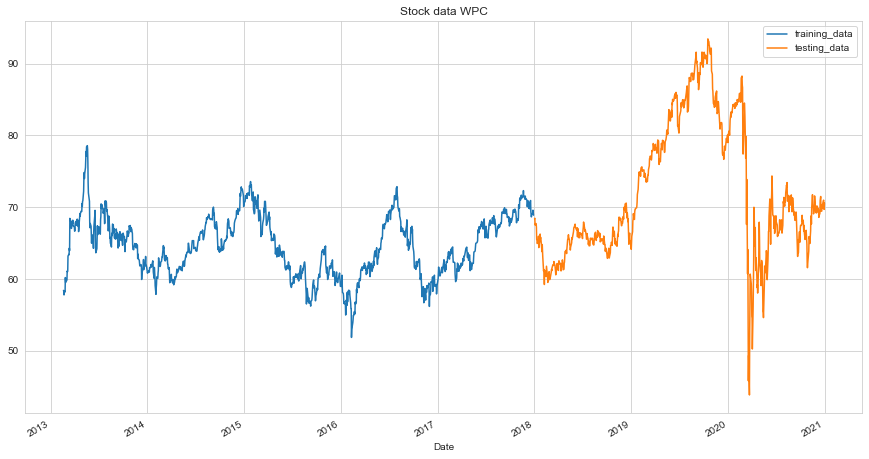

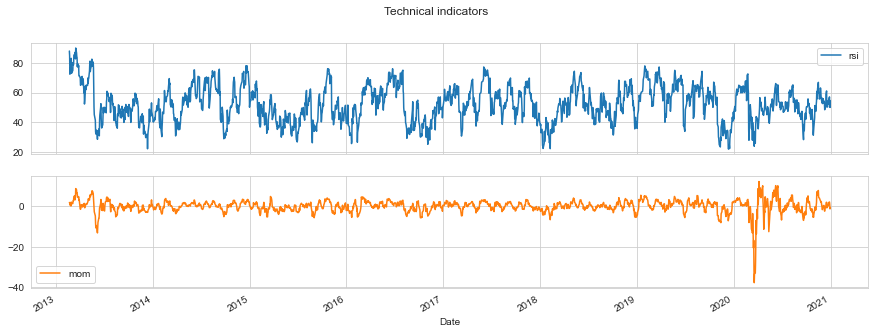

In [2]:
stock_name = 'wpc'.upper()
industry = 'Real estate'
stock_data = pd.read_csv(f'../train_test_data/{stock_name}.csv', index_col=['Date'], parse_dates=True)

train_data = stock_data.loc[:'2018-01-01']
test_data = stock_data.loc['2018-01-01':]

print(f'Stock name: {stock_name}')
print(f'Start: {stock_data.index[0]}, End: {stock_data.index[-1]}')
print(f'Training data: {len(train_data)} ')
print(f'Tsesting data: {len(test_data)} ')

sns.set_style('whitegrid')
train_data['Adj Close'].plot(label='training_data', figsize=(15,8));
test_data['Adj Close'].plot(label='testing_data');
plt.title('Stock data '+ stock_name)
plt.legend();
plt.show()

stock_data[['rsi', 'mom']].plot(subplots=True, figsize=(15,5), title='Technical indicators');
plt.show()




In [3]:
num_episodes = 2000
batch_size = 32
capital = 1000
data = stock_data['Adj Close'].values
n_timesteps = data.shape[0]


env = StockEnv(train_data, capital)
state_size = env.state_dim
action_size = 2
agent = DQNAgent(state_size, action_size)
scaler = get_scaler(env)

  0%|          | 0/2000 [00:00<?, ?it/s]

episode: 1/2000, episode end value: 1160.96, duration: 0:00:00.533119
episode: 2/2000, episode end value: 1121.60, duration: 0:00:00.460110
episode: 3/2000, episode end value: 1128.03, duration: 0:00:00.444785
episode: 4/2000, episode end value: 1195.70, duration: 0:00:00.361207
episode: 5/2000, episode end value: 1102.62, duration: 0:00:00.366107
episode: 6/2000, episode end value: 1143.22, duration: 0:00:00.371363
episode: 7/2000, episode end value: 1141.06, duration: 0:00:00.392979
episode: 8/2000, episode end value: 1108.20, duration: 0:00:00.347056
episode: 9/2000, episode end value: 1128.39, duration: 0:00:00.355112
episode: 10/2000, episode end value: 1137.49, duration: 0:00:00.409950
episode: 11/2000, episode end value: 1159.99, duration: 0:00:00.482709
episode: 12/2000, episode end value: 1137.34, duration: 0:00:00.376403
episode: 13/2000, episode end value: 1169.29, duration: 0:00:00.455482
episode: 14/2000, episode end value: 1141.54, duration: 0:00:00.392285
episode: 15/200

episode: 117/2000, episode end value: 1129.18, duration: 0:00:00.484146
episode: 118/2000, episode end value: 1113.48, duration: 0:00:00.456902
episode: 119/2000, episode end value: 1146.99, duration: 0:00:00.403304
episode: 120/2000, episode end value: 1142.15, duration: 0:00:00.479277
episode: 121/2000, episode end value: 1211.15, duration: 0:00:00.471042
episode: 122/2000, episode end value: 1110.91, duration: 0:00:00.354592
episode: 123/2000, episode end value: 1147.45, duration: 0:00:00.495282
episode: 124/2000, episode end value: 1099.13, duration: 0:00:00.459345
episode: 125/2000, episode end value: 1115.64, duration: 0:00:00.434825
episode: 126/2000, episode end value: 1143.96, duration: 0:00:00.475025
episode: 127/2000, episode end value: 1138.51, duration: 0:00:00.416156
episode: 128/2000, episode end value: 1118.73, duration: 0:00:00.421084
episode: 129/2000, episode end value: 1119.76, duration: 0:00:00.376755
episode: 130/2000, episode end value: 1155.80, duration: 0:00:00

episode: 231/2000, episode end value: 1129.25, duration: 0:00:00.495150
episode: 232/2000, episode end value: 1145.78, duration: 0:00:00.516901
episode: 233/2000, episode end value: 1141.02, duration: 0:00:00.469775
episode: 234/2000, episode end value: 1144.90, duration: 0:00:00.495983
episode: 235/2000, episode end value: 1079.54, duration: 0:00:00.409693
episode: 236/2000, episode end value: 1141.09, duration: 0:00:00.390657
episode: 237/2000, episode end value: 1136.66, duration: 0:00:00.482497
episode: 238/2000, episode end value: 1141.15, duration: 0:00:00.473878
episode: 239/2000, episode end value: 1124.52, duration: 0:00:00.450111
episode: 240/2000, episode end value: 1129.68, duration: 0:00:00.466865
episode: 241/2000, episode end value: 1116.35, duration: 0:00:00.431354
episode: 242/2000, episode end value: 1136.72, duration: 0:00:00.413601
episode: 243/2000, episode end value: 1137.38, duration: 0:00:00.434972
episode: 244/2000, episode end value: 1139.09, duration: 0:00:00

episode: 345/2000, episode end value: 1131.96, duration: 0:00:00.463239
episode: 346/2000, episode end value: 1111.10, duration: 0:00:00.437562
episode: 347/2000, episode end value: 1123.02, duration: 0:00:00.496697
episode: 348/2000, episode end value: 1144.10, duration: 0:00:00.453178
episode: 349/2000, episode end value: 1134.21, duration: 0:00:00.467900
episode: 350/2000, episode end value: 1124.54, duration: 0:00:00.416171
episode: 351/2000, episode end value: 1132.64, duration: 0:00:00.422346
episode: 352/2000, episode end value: 1113.13, duration: 0:00:00.445143
episode: 353/2000, episode end value: 1118.15, duration: 0:00:00.490753
episode: 354/2000, episode end value: 1132.75, duration: 0:00:00.441385
episode: 355/2000, episode end value: 1134.81, duration: 0:00:00.398454
episode: 356/2000, episode end value: 1140.46, duration: 0:00:00.495099
episode: 357/2000, episode end value: 1125.97, duration: 0:00:00.438665
episode: 358/2000, episode end value: 1167.52, duration: 0:00:00

episode: 459/2000, episode end value: 1107.42, duration: 0:00:00.438961
episode: 460/2000, episode end value: 1137.82, duration: 0:00:00.488465
episode: 461/2000, episode end value: 1131.54, duration: 0:00:00.453415
episode: 462/2000, episode end value: 1125.06, duration: 0:00:00.440566
episode: 463/2000, episode end value: 1123.80, duration: 0:00:00.413295
episode: 464/2000, episode end value: 1114.41, duration: 0:00:00.508647
episode: 465/2000, episode end value: 1123.71, duration: 0:00:00.470734
episode: 466/2000, episode end value: 1105.66, duration: 0:00:00.485084
episode: 467/2000, episode end value: 1128.32, duration: 0:00:00.449405
episode: 468/2000, episode end value: 1133.23, duration: 0:00:00.457974
episode: 469/2000, episode end value: 1109.02, duration: 0:00:00.420740
episode: 470/2000, episode end value: 1137.69, duration: 0:00:00.449971
episode: 471/2000, episode end value: 1149.04, duration: 0:00:00.462447
episode: 472/2000, episode end value: 1132.75, duration: 0:00:00

episode: 573/2000, episode end value: 1140.07, duration: 0:00:00.422566
episode: 574/2000, episode end value: 1172.43, duration: 0:00:00.433427
episode: 575/2000, episode end value: 1105.58, duration: 0:00:00.416347
episode: 576/2000, episode end value: 1141.13, duration: 0:00:00.426649
episode: 577/2000, episode end value: 1152.27, duration: 0:00:00.404471
episode: 578/2000, episode end value: 1157.77, duration: 0:00:00.444194
episode: 579/2000, episode end value: 1117.37, duration: 0:00:00.469963
episode: 580/2000, episode end value: 1132.01, duration: 0:00:00.471080
episode: 581/2000, episode end value: 1125.08, duration: 0:00:00.403852
episode: 582/2000, episode end value: 1143.85, duration: 0:00:00.400645
episode: 583/2000, episode end value: 1111.77, duration: 0:00:00.456721
episode: 584/2000, episode end value: 1137.61, duration: 0:00:00.426848
episode: 585/2000, episode end value: 1129.26, duration: 0:00:00.481791
episode: 586/2000, episode end value: 1121.30, duration: 0:00:00

episode: 687/2000, episode end value: 1126.98, duration: 0:00:00.438085
episode: 688/2000, episode end value: 1104.98, duration: 0:00:00.411508
episode: 689/2000, episode end value: 1136.42, duration: 0:00:00.413458
episode: 690/2000, episode end value: 1114.56, duration: 0:00:00.421046
episode: 691/2000, episode end value: 1106.17, duration: 0:00:00.430998
episode: 692/2000, episode end value: 1083.65, duration: 0:00:00.467753
episode: 693/2000, episode end value: 1122.84, duration: 0:00:00.576149
episode: 694/2000, episode end value: 1117.98, duration: 0:00:00.645330
episode: 695/2000, episode end value: 1146.89, duration: 0:00:00.587469
episode: 696/2000, episode end value: 1142.74, duration: 0:00:00.508443
episode: 697/2000, episode end value: 1136.38, duration: 0:00:00.401057
episode: 698/2000, episode end value: 1140.07, duration: 0:00:00.555343
episode: 699/2000, episode end value: 1135.86, duration: 0:00:00.431527
episode: 700/2000, episode end value: 1136.95, duration: 0:00:00

episode: 801/2000, episode end value: 1137.99, duration: 0:00:00.497759
episode: 802/2000, episode end value: 1138.08, duration: 0:00:00.434779
episode: 803/2000, episode end value: 1125.57, duration: 0:00:00.443815
episode: 804/2000, episode end value: 1117.57, duration: 0:00:00.403322
episode: 805/2000, episode end value: 1116.77, duration: 0:00:00.468545
episode: 806/2000, episode end value: 1106.61, duration: 0:00:00.459031
episode: 807/2000, episode end value: 1166.24, duration: 0:00:00.506838
episode: 808/2000, episode end value: 1168.27, duration: 0:00:00.446334
episode: 809/2000, episode end value: 1126.99, duration: 0:00:00.355595
episode: 810/2000, episode end value: 1117.92, duration: 0:00:00.457248
episode: 811/2000, episode end value: 1115.57, duration: 0:00:00.562563
episode: 812/2000, episode end value: 1152.65, duration: 0:00:00.378247
episode: 813/2000, episode end value: 1185.41, duration: 0:00:00.409267
episode: 814/2000, episode end value: 1102.42, duration: 0:00:00

episode: 915/2000, episode end value: 1119.41, duration: 0:00:00.457890
episode: 916/2000, episode end value: 1113.52, duration: 0:00:00.521390
episode: 917/2000, episode end value: 1138.78, duration: 0:00:00.408526
episode: 918/2000, episode end value: 1124.47, duration: 0:00:00.295296
episode: 919/2000, episode end value: 1147.55, duration: 0:00:00.469641
episode: 920/2000, episode end value: 1145.37, duration: 0:00:00.416999
episode: 921/2000, episode end value: 1130.65, duration: 0:00:00.406896
episode: 922/2000, episode end value: 1133.66, duration: 0:00:00.435924
episode: 923/2000, episode end value: 1162.31, duration: 0:00:00.435382
episode: 924/2000, episode end value: 1148.17, duration: 0:00:00.445514
episode: 925/2000, episode end value: 1168.29, duration: 0:00:00.415482
episode: 926/2000, episode end value: 1150.12, duration: 0:00:00.438812
episode: 927/2000, episode end value: 1128.92, duration: 0:00:00.467989
episode: 928/2000, episode end value: 1125.10, duration: 0:00:00

episode: 1029/2000, episode end value: 1137.51, duration: 0:00:00.428086
episode: 1030/2000, episode end value: 1143.78, duration: 0:00:00.451913
episode: 1031/2000, episode end value: 1142.02, duration: 0:00:00.518022
episode: 1032/2000, episode end value: 1145.21, duration: 0:00:00.469165
episode: 1033/2000, episode end value: 1158.97, duration: 0:00:00.395280
episode: 1034/2000, episode end value: 1101.34, duration: 0:00:00.428470
episode: 1035/2000, episode end value: 1146.43, duration: 0:00:00.495420
episode: 1036/2000, episode end value: 1137.93, duration: 0:00:00.388867
episode: 1037/2000, episode end value: 1116.06, duration: 0:00:00.497979
episode: 1038/2000, episode end value: 1116.22, duration: 0:00:00.447300
episode: 1039/2000, episode end value: 1119.97, duration: 0:00:00.389265
episode: 1040/2000, episode end value: 1149.92, duration: 0:00:00.419653
episode: 1041/2000, episode end value: 1157.55, duration: 0:00:00.403333
episode: 1042/2000, episode end value: 1170.02, dur

episode: 1142/2000, episode end value: 1154.52, duration: 0:00:00.377819
episode: 1143/2000, episode end value: 1152.54, duration: 0:00:00.489165
episode: 1144/2000, episode end value: 1133.67, duration: 0:00:00.438223
episode: 1145/2000, episode end value: 1164.40, duration: 0:00:00.426576
episode: 1146/2000, episode end value: 1153.16, duration: 0:00:00.482838
episode: 1147/2000, episode end value: 1158.27, duration: 0:00:00.433000
episode: 1148/2000, episode end value: 1111.57, duration: 0:00:00.403469
episode: 1149/2000, episode end value: 1124.14, duration: 0:00:00.478173
episode: 1150/2000, episode end value: 1109.84, duration: 0:00:00.523943
episode: 1151/2000, episode end value: 1118.83, duration: 0:00:00.514750
episode: 1152/2000, episode end value: 1143.77, duration: 0:00:00.520030
episode: 1153/2000, episode end value: 1155.66, duration: 0:00:00.549661
episode: 1154/2000, episode end value: 1108.70, duration: 0:00:00.428386
episode: 1155/2000, episode end value: 1127.38, dur

episode: 1255/2000, episode end value: 1140.69, duration: 0:00:00.422733
episode: 1256/2000, episode end value: 1139.31, duration: 0:00:00.454716
episode: 1257/2000, episode end value: 1167.43, duration: 0:00:00.411600
episode: 1258/2000, episode end value: 1141.79, duration: 0:00:00.421215
episode: 1259/2000, episode end value: 1117.11, duration: 0:00:00.509416
episode: 1260/2000, episode end value: 1121.19, duration: 0:00:00.528443
episode: 1261/2000, episode end value: 1133.07, duration: 0:00:00.493708
episode: 1262/2000, episode end value: 1144.24, duration: 0:00:00.396469
episode: 1263/2000, episode end value: 1116.65, duration: 0:00:00.535698
episode: 1264/2000, episode end value: 1139.42, duration: 0:00:00.458392
episode: 1265/2000, episode end value: 1134.03, duration: 0:00:00.462471
episode: 1266/2000, episode end value: 1115.11, duration: 0:00:00.575858
episode: 1267/2000, episode end value: 1115.99, duration: 0:00:00.564227
episode: 1268/2000, episode end value: 1141.30, dur

episode: 1368/2000, episode end value: 1114.29, duration: 0:00:00.442891
episode: 1369/2000, episode end value: 1137.42, duration: 0:00:00.485612
episode: 1370/2000, episode end value: 1141.33, duration: 0:00:00.404402
episode: 1371/2000, episode end value: 1138.63, duration: 0:00:00.392024
episode: 1372/2000, episode end value: 1137.02, duration: 0:00:00.409280
episode: 1373/2000, episode end value: 1130.32, duration: 0:00:00.387251
episode: 1374/2000, episode end value: 1117.22, duration: 0:00:00.350033
episode: 1375/2000, episode end value: 1123.28, duration: 0:00:00.379741
episode: 1376/2000, episode end value: 1129.13, duration: 0:00:00.425037
episode: 1377/2000, episode end value: 1130.84, duration: 0:00:00.395103
episode: 1378/2000, episode end value: 1128.45, duration: 0:00:00.376529
episode: 1379/2000, episode end value: 1132.10, duration: 0:00:00.366257
episode: 1380/2000, episode end value: 1126.85, duration: 0:00:00.420358
episode: 1381/2000, episode end value: 1121.57, dur

episode: 1481/2000, episode end value: 1111.18, duration: 0:00:00.335108
episode: 1482/2000, episode end value: 1108.94, duration: 0:00:00.330661
episode: 1483/2000, episode end value: 1118.93, duration: 0:00:00.366210
episode: 1484/2000, episode end value: 1120.92, duration: 0:00:00.341627
episode: 1485/2000, episode end value: 1123.34, duration: 0:00:00.295537
episode: 1486/2000, episode end value: 1127.48, duration: 0:00:00.386516
episode: 1487/2000, episode end value: 1111.95, duration: 0:00:00.312421
episode: 1488/2000, episode end value: 1112.61, duration: 0:00:00.347391
episode: 1489/2000, episode end value: 1120.25, duration: 0:00:00.385759
episode: 1490/2000, episode end value: 1094.19, duration: 0:00:00.361797
episode: 1491/2000, episode end value: 1130.96, duration: 0:00:00.359703
episode: 1492/2000, episode end value: 1142.67, duration: 0:00:00.370213
episode: 1493/2000, episode end value: 1142.10, duration: 0:00:00.382151
episode: 1494/2000, episode end value: 1144.65, dur

episode: 1594/2000, episode end value: 1114.65, duration: 0:00:00.285692
episode: 1595/2000, episode end value: 1118.24, duration: 0:00:00.290335
episode: 1596/2000, episode end value: 1103.03, duration: 0:00:00.297285
episode: 1597/2000, episode end value: 1087.68, duration: 0:00:00.289165
episode: 1598/2000, episode end value: 1138.32, duration: 0:00:00.301792
episode: 1599/2000, episode end value: 1130.56, duration: 0:00:00.318549
episode: 1600/2000, episode end value: 1165.61, duration: 0:00:00.286609
episode: 1601/2000, episode end value: 1172.73, duration: 0:00:00.299614
episode: 1602/2000, episode end value: 1107.45, duration: 0:00:00.274464
episode: 1603/2000, episode end value: 1130.03, duration: 0:00:00.313848
episode: 1604/2000, episode end value: 1151.22, duration: 0:00:00.302864
episode: 1605/2000, episode end value: 1161.74, duration: 0:00:00.318135
episode: 1606/2000, episode end value: 1170.54, duration: 0:00:00.292458
episode: 1607/2000, episode end value: 1152.95, dur

episode: 1707/2000, episode end value: 1178.07, duration: 0:00:00.251000
episode: 1708/2000, episode end value: 1121.52, duration: 0:00:00.220070
episode: 1709/2000, episode end value: 1168.13, duration: 0:00:00.239417
episode: 1710/2000, episode end value: 1173.44, duration: 0:00:00.239652
episode: 1711/2000, episode end value: 1152.90, duration: 0:00:00.242577
episode: 1712/2000, episode end value: 1103.38, duration: 0:00:00.243367
episode: 1713/2000, episode end value: 1086.67, duration: 0:00:00.259264
episode: 1714/2000, episode end value: 1113.24, duration: 0:00:00.232746
episode: 1715/2000, episode end value: 1139.95, duration: 0:00:00.213718
episode: 1716/2000, episode end value: 1134.58, duration: 0:00:00.242456
episode: 1717/2000, episode end value: 1127.71, duration: 0:00:00.222705
episode: 1718/2000, episode end value: 1130.30, duration: 0:00:00.234081
episode: 1719/2000, episode end value: 1125.13, duration: 0:00:00.244820
episode: 1720/2000, episode end value: 1111.34, dur

episode: 1820/2000, episode end value: 1128.73, duration: 0:00:00.211123
episode: 1821/2000, episode end value: 1130.25, duration: 0:00:00.218083
episode: 1822/2000, episode end value: 1149.81, duration: 0:00:00.206458
episode: 1823/2000, episode end value: 1131.77, duration: 0:00:00.210803
episode: 1824/2000, episode end value: 1083.67, duration: 0:00:00.224921
episode: 1825/2000, episode end value: 1109.97, duration: 0:00:00.222233
episode: 1826/2000, episode end value: 1145.64, duration: 0:00:00.214482
episode: 1827/2000, episode end value: 1111.74, duration: 0:00:00.194480
episode: 1828/2000, episode end value: 1125.85, duration: 0:00:00.212291
episode: 1829/2000, episode end value: 1112.04, duration: 0:00:00.209503
episode: 1830/2000, episode end value: 1095.68, duration: 0:00:00.214348
episode: 1831/2000, episode end value: 1111.68, duration: 0:00:00.221275
episode: 1832/2000, episode end value: 1127.88, duration: 0:00:00.214158
episode: 1833/2000, episode end value: 1127.51, dur

episode: 1933/2000, episode end value: 1115.89, duration: 0:00:00.208320
episode: 1934/2000, episode end value: 1114.33, duration: 0:00:00.220277
episode: 1935/2000, episode end value: 1111.47, duration: 0:00:00.224656
episode: 1936/2000, episode end value: 1116.75, duration: 0:00:00.245172
episode: 1937/2000, episode end value: 1145.13, duration: 0:00:00.231571
episode: 1938/2000, episode end value: 1142.11, duration: 0:00:00.194497
episode: 1939/2000, episode end value: 1167.34, duration: 0:00:00.203139
episode: 1940/2000, episode end value: 1144.37, duration: 0:00:00.223388
episode: 1941/2000, episode end value: 1140.38, duration: 0:00:00.216701
episode: 1942/2000, episode end value: 1160.10, duration: 0:00:00.228364
episode: 1943/2000, episode end value: 1151.06, duration: 0:00:00.204290
episode: 1944/2000, episode end value: 1150.52, duration: 0:00:00.225371
episode: 1945/2000, episode end value: 1155.43, duration: 0:00:00.206978
episode: 1946/2000, episode end value: 1099.18, dur

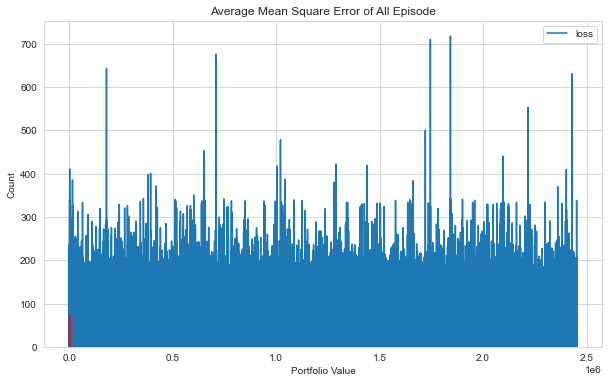

In [4]:
#train


mode = 'train'

portfolio_value = []



for e in tqdm(range(num_episodes)):
    t0 = datetime.now()
    val = play_one_episode(agent, env, mode, scaler)
    dt = datetime.now() - t0
    print(f"episode: {e + 1}/{num_episodes}, episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
    portfolio_value.append(val['portfolio_value'][-1]) 


if mode == 'train':
    # save the DQN
    agent.save(f'state_dict/{stock_name}.npz')

    # save the scaler
    with open(f'scaler/{stock_name}.pkl', 'wb') as f:
        pickle.dump(scaler, f)

    # plot losses
    loss = agent.model.losses
    losses = pd.DataFrame(loss, columns=['loss'])
    losses.plot(figsize=(10,6))
    plt.title('Average Mean Square Error of All Episode')
    plt.xlabel('Step')
    plt.ylabel('Mean Square Error')

print(f'average reward: {np.mean(portfolio_value):.2f}, min: {np.min(portfolio_value):.2f}, max: {np.max(portfolio_value):.2f}')
sns.histplot(portfolio_value, bins=100, color='r', kde=True);
plt.xlabel('Portfolio Value');
plt.ylabel('Count');

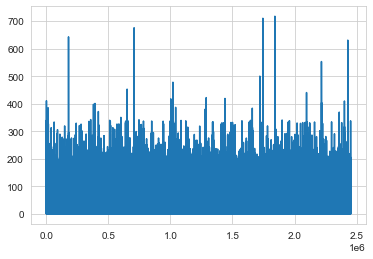

In [5]:
plt.plot(agent.model.losses)

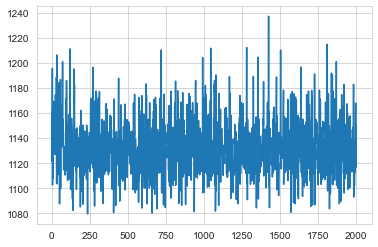

In [6]:
plt.plot(portfolio_value)

episode end value: 1100.74, duration: 0:00:00.079250
Sell: 235 times, Buy: 188 times


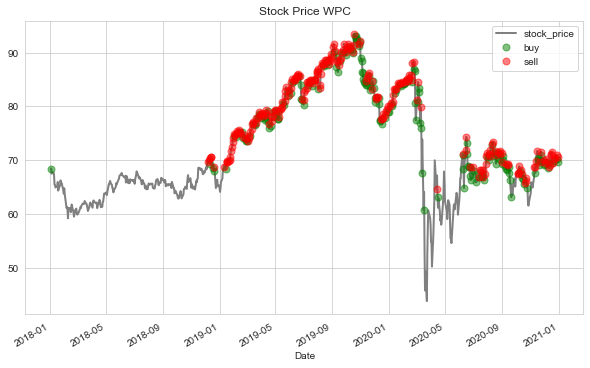

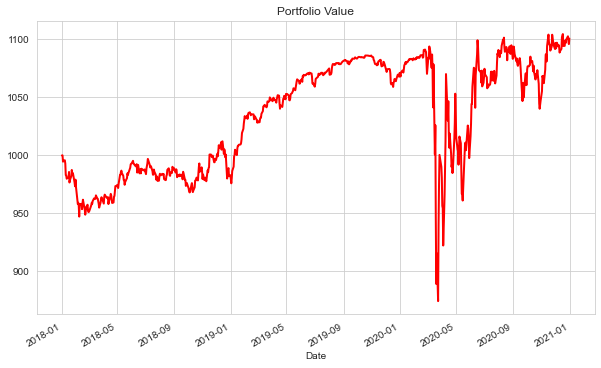

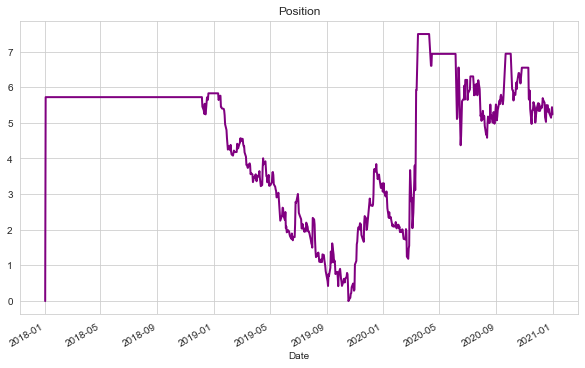

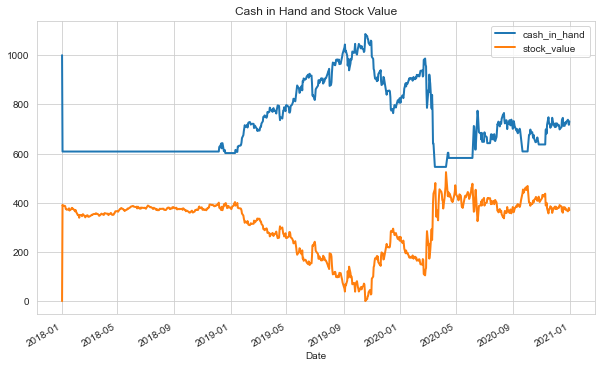

In [7]:
#test

mode = 'test'

portfolio_value = []


with open(f'scaler/{stock_name}.pkl', 'rb') as f:
    scaler = pickle.load(f)
    
env = StockEnv(test_data, capital)
agent.epsilon = 0
agent.load(f'state_dict/{stock_name}.npz')



t0 = datetime.now()
val = play_one_episode(agent, env, mode, scaler)
dt = datetime.now() - t0
print(f"episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
portfolio_value.append(val['portfolio_value'][-1])
    
print(f"Sell: {env.sell_buy.count('sell')} times, Buy: {env.sell_buy.count('buy')} times")



result = pd.DataFrame(val)
result.index = test_data.index

def marker_buy(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'buy':
        return price
    else:
        return np.nan
    
def marker_sell(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'sell':
        return price
    else:
        return np.nan
    
result['marker_buy'] = result[['stock_price', 'sell_buy']].apply(marker_buy, axis=1);
result['marker_sell'] = result[['stock_price', 'sell_buy']].apply(marker_sell, axis=1);

result['stock_price'].plot(figsize=(10,6), c='grey', lw=2);
result['marker_buy'].plot(style='o', ms=7, label='buy', c='g', alpha=0.5);
result['marker_sell'].plot(style='o', ms=7, label='sell', c='r', alpha=0.5);
plt.title('Stock Price '+ stock_name)
plt.legend();
plt.show()



result['portfolio_value'].plot(figsize=(10,6), c='r', lw=2);
plt.title('Portfolio Value');
plt.show()

result['stock_owned'].plot(figsize=(10,6), c='purple', lw=2);
plt.title('Position')
plt.show()

result[['cash_in_hand', 'stock_value']].plot(figsize=(10,6), lw=2);
plt.title('Cash in Hand and Stock Value');
plt.show()

In [8]:


def CAGR(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    n = len(df)/252
    cagr = (df['cumulative_ret'][-1])**(1/n) - 1
    return cagr

def volatility(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    vol = df['daily_ret'].std() * np.sqrt(252)
    return vol


def sharpe(DF, rf):
    df = DF.copy()
    sr = (CAGR(df) - rf)/volatility(df)
    return sr

def max_dd(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    df['cum_roll_max'] = df['cumulative_ret'].cummax()
    df['drawdown'] = df['cum_roll_max'] - df['cumulative_ret']
    df['drawdown_pct'] = df['drawdown']/df['cum_roll_max']
    max_dd = df['drawdown_pct'].max()
    return max_dd

def calmer(DF):
    df = DF.copy()
    clmr = CAGR(df)/max_dd(df)
    return clmr



print(f'Stock name: {stock_name}')
print(f'Start: {result.index[0]}  End: {result.index[-1]}')
print(f'Compound Annual Growth Rate: {CAGR(result)*100:.2f} %')
print(f'Volatility: {volatility(result):.4f}')
print(f'shape ratio: {sharpe(result, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(result)*-100:.2f} %')
print(f'Calmar ratio: {calmer(result):.4f}')
print('-----------------------------------------------------------')
print('-----------------------------------------------------------')
print('Comparing with Adj close')
print(f'Compound Annual Growth Rate (Adj close): {CAGR(test_data)*100:.2f} %')
print(f'Volatility (benchmark): {volatility(test_data):.4f}')
print(f'shape ratio: {sharpe(test_data, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(test_data)*-100:.2f} %')
print(f'Calmar ratio (benchmark): {calmer(test_data):.4f}')

Stock name: WPC
Start: 2018-01-02 00:00:00  End: 2020-12-31 00:00:00
Compound Annual Growth Rate: 3.25 %
Volatility: 0.1415
shape ratio: 0.1521
Maximun drawdown: -20.08 %
Calmar ratio: 0.1619
-----------------------------------------------------------
-----------------------------------------------------------
Comparing with Adj close
Compound Annual Growth Rate (Adj close): 1.06 %
Volatility (benchmark): 0.3648
shape ratio: -0.0011
Maximun drawdown: -53.07 %
Calmar ratio (benchmark): 0.0200


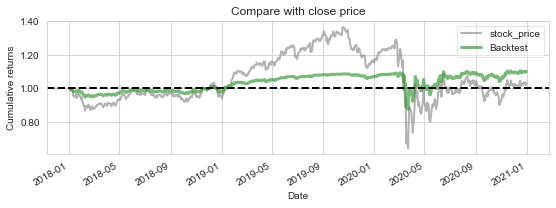

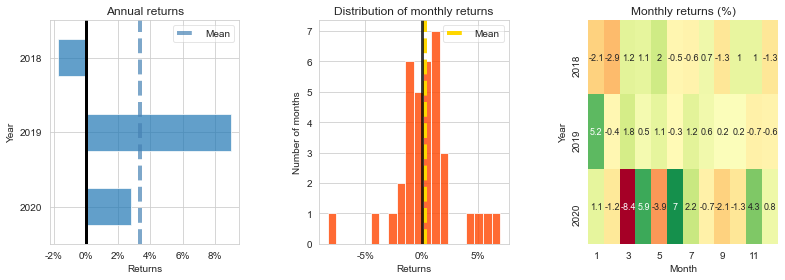

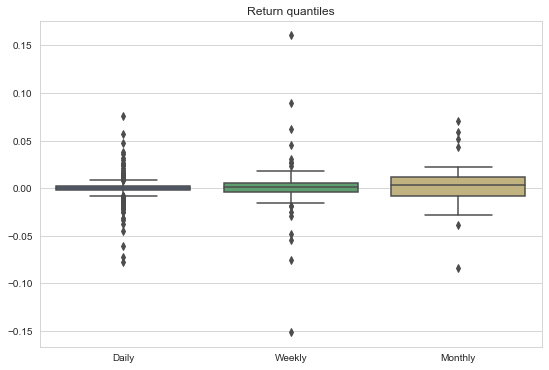

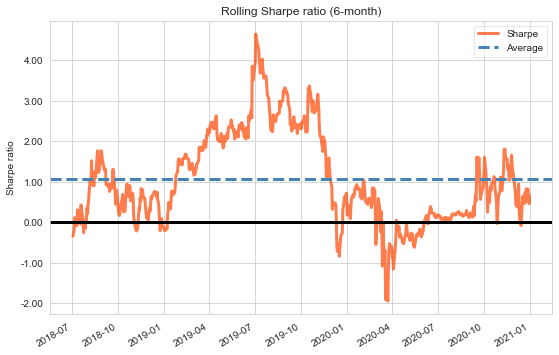

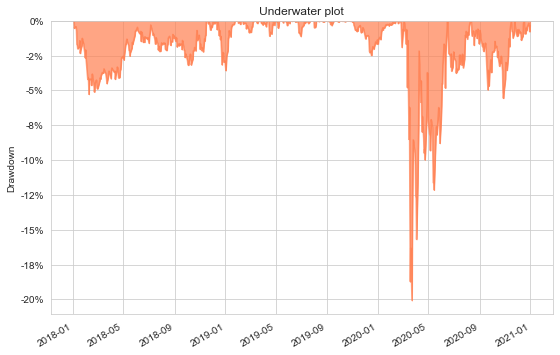

In [9]:


bt_returns = result['portfolio_value'].pct_change()
price = result['stock_price'].pct_change()



plt.figure(figsize=(9,6));
plt.subplot(2,1,1);
pf.plotting.plot_rolling_returns(bt_returns, price);
plt.title('Compare with close price');
plt.show()

fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_annual_returns(bt_returns)
plt.subplot(1,3,2)
pf.plot_monthly_returns_dist(bt_returns)
plt.subplot(1,3,3)
pf.plot_monthly_returns_heatmap(bt_returns)
plt.tight_layout()
fig.set_size_inches(12,4)

plt.figure(figsize=(9,6))
pf.plot_return_quantiles(bt_returns);



plt.figure(figsize=(9,6))
pf.plot_rolling_sharpe(bt_returns);

plt.figure(figsize=(9,6))
pf.plot_drawdown_underwater(bt_returns);

score = (sharpe(result, 0.011) - sharpe(test_data, 0.011))*10
ret = ((result['portfolio_value'][-1] - result['portfolio_value'][0])/result['portfolio_value'][0]) * 100
with open(f'score/{stock_name}.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([stock_name, industry,score, ret], f)
    
    
result.to_csv(f'../data/{stock_name}.csv')